<center><h1><span style="">Universidad Nacional Agraria La Molina</span></h1></center>
<center><h2><span style="">Carrera Profesional de Estadística Infórmatica</span></h2></center>

<center><img src="https://raw.githubusercontent.com/tengolaaag/Final-LP2/main/escudo.jpg" width="300" height="200"></center>

<center><h4><span style="">Curso: Lenguaje de Programación II</span></h4></center>
<center><h3><span style=""> <b>Proyecto: <i>   </b></i></span></h3></center>

<center><h3><span style="">Docente: Mg. Denise CHALAN LLAJARUNA</span></h3></center>

### Integrantes: 
- Pedro Isaac Ñaupa Celis
- Manolo Meza Rodríguez
- Bruno Fabrizzio Candiotti Neyra

## Introducción

# Objetivos (sb)
## Objetivo General
- Analizar los sentimientos generados en los comentarios de telefonos inteligentes vendido en Amazon EEUU.
## Objetivos específicos
- Extraer la base de datos en un archivo csv.
- Visualizar información relevante de cada telefono inteligente vendido en Amazon EEUU.
- Mostrar gráficas de sentimientos.
- Verificar las ofertas.

# Planificación del proyecto
## Distribución de roles
- Desarrollador Principal: Bruno
    - Responsabilidades:
         -	Liderar el desarrollo de la extracción de datos
         -	Configuración y autenticación de la API.
        -	Asegurar la correcta integración de todas las partes del proyecto.
        -	Guardar los datos extraídos en una base de datos o en archivos CSV/JSON.

- Encargado de Documentación y Análisis de datos: Manolo
    - Responsabilidades:
        - Colaborar con Bruno en el desarrollo del código para extraer información relevante de los anuncios.
        - Documentar cada parte del código y del proceso.
        - Procesar y limpiar los datos extraídos.
        - Realizar la transformación de datos útil, como calcular estadísticas básicas.
        - Asegurarse de que toda la documentación esté clara y completa.
- Project Manager y Encargado de la Página Web: Isaac
  - Responsabilidades:
      -  Coordinar y supervisar todas las actividades del proyecto.
      -   Configurar el flujo de trabajo en GitHub y gestionar ramas y merges.
      -   Crear la página web utilizando HTML y bibliotecas de visualización.
      -   Incluir elementos interactivos para mejorar la experiencia del usuario
      -   .Configurar el flujo de trabajo en GitHub y gestionar las ramas y los merges.
      -   Realizar pruebas exhaustivas de la página web.
## Flujo de trabajo
- Cada integrante del proyecto crea ramas para funcionalidades relacionadas con su rol
- Crear Pull Requests y fusionar ramas en main.

# Documentación (sb)


https://rapidapi.com/letscrape-6bRBa3QguO5/api/real-time-amazon-dat






# Extracción de información


# Descarga automatizada del csv


In [25]:
import requests
import csv

url = "https://real-time-amazon-data.p.rapidapi.com/search"

querystring = {
    "query": "Phone",
    "page": "1",
    "country": "US",
    "sort_by": "RELEVANCE",
    "product_condition": "ALL"
}

headers = {
    "x-rapidapi-key": "b1627f263cmshc8a4015df1f477fp133675jsnba40922e0ffc",
    "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    products_data = response.json()
    
    # Verificar si los datos tienen productos
    if 'data' in products_data and 'products' in products_data['data']:
        products = products_data['data']['products']
        
        # Definir el nombre del archivo CSV
        csv_filename = "amazon_phone_products.csv"
        
        # Abrir el archivo CSV en modo escritura
        with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            
            # Escribir la cabecera del CSV (basada en las claves del primer producto)
            header = products[0].keys()
            writer.writerow(header)
            
            # Escribir los datos de los productos
            for product in products:
                writer.writerow(product.values())
        
        print(f"Los datos se han guardado en el archivo {csv_filename}")
    else:
        print("No se encontraron productos en los datos de la API.")
else:
    print("Solicitud HTTP fallida con el código de estado: ", response.status_code)

Los datos se han guardado en el archivo amazon_phone_products.csv


In [26]:
import requests

url = "https://real-time-amazon-data.p.rapidapi.com/search"

querystring = {
    "query": "Phone",
    "page": "1",
    "country": "US",
    "sort_by": "RELEVANCE",
    "product_condition": "ALL"
}

headers = {
    "x-rapidapi-key": "b1627f263cmshc8a4015df1f477fp133675jsnba40922e0ffc",
    "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    products_data = response.json()
    
    # Verificar si los datos tienen productos
    if 'data' in products_data and 'products' in products_data['data']:
        products = products_data['data']['products']
        
        # Mostrar información del primer teléfono
        if products:
            first_phone = products[0]
            for key, value in first_phone.items():
                print(f"{key}: {value}")
        else:
            print("No se encontraron productos.")
    else:
        print("No se encontraron productos en los datos de la API.")
else:
    print("Solicitud HTTP fallida con el código de estado: ", response.status_code)

asin: B0CN1QSH8Q
product_title: SAMSUNG Galaxy A15 5G A Series Cell Phone, 128GB Unlocked Android Smartphone, AMOLED Display, Expandable Storage, Knox Security, Super Fast Charging, Hi-Res Camera, US Version, 2024, Blue Black
product_price: $199.99
product_original_price: None
currency: USD
product_star_rating: 4.1
product_num_ratings: 350
product_url: https://www.amazon.com/dp/B0CN1QSH8Q
product_photo: https://m.media-amazon.com/images/I/61s0ZzwzSCL._AC_UY654_FMwebp_QL65_.jpg
product_num_offers: 2
product_minimum_offer_price: $146.93
is_best_seller: False
is_amazon_choice: False
is_prime: True
climate_pledge_friendly: True
sales_volume: 2K+ bought in past month
delivery: FREE delivery Fri, Jul 19 Or fastest delivery Tue, Jul 16
has_variations: True


In [2]:
import requests

url = "https://real-time-amazon-data.p.rapidapi.com/search"

querystring = {
    "query": "Phone",
    "page": "1",
    "country": "US",
    "sort_by": "RELEVANCE",
    "product_condition": "ALL"
}

headers = {
    "x-rapidapi-key": "b1627f263cmshc8a4015df1f477fp133675jsnba40922e0ffc",
    "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    products_data = response.json()
    
    # Extraer información de los productos
    products = products_data.get('data', {}).get('products', [])
    
    for product in products:
        asin = product.get('asin')
        title = product.get('product_title')
        price = product.get('product_price')
        original_price = product.get('product_original_price')
        rating = product.get('product_star_rating')
        num_ratings = product.get('product_num_ratings')
        url = product.get('product_url')
        photo_url = product.get('product_photo')
        num_offers = product.get('product_num_offers')
        minimum_offer_price = product.get('product_minimum_offer_price')
        is_best_seller = product.get('is_best_seller')
        is_amazon_choice = product.get('is_amazon_choice')
        is_prime = product.get('is_prime')
        climate_pledge_friendly = product.get('climate_pledge_friendly')
        sales_volume = product.get('sales_volume')
        delivery = product.get('delivery')
        has_variations = product.get('has_variations')
        
        print(f"ASIN: {asin}")
        print(f"Title: {title}")
        print(f"Price: {price}")
        print(f"Original Price: {original_price}")
        print(f"Rating: {rating}")
        print(f"Number of Ratings: {num_ratings}")
        print(f"URL: {url}")
        print(f"Photo URL: {photo_url}")
        print(f"Number of Offers: {num_offers}")
        print(f"Minimum Offer Price: {minimum_offer_price}")
        print(f"Best Seller: {is_best_seller}")
        print(f"Amazon Choice: {is_amazon_choice}")
        print(f"Prime: {is_prime}")
        print(f"Climate Pledge Friendly: {climate_pledge_friendly}")
        print(f"Sales Volume: {sales_volume}")
        print(f"Delivery: {delivery}")
        print(f"Has Variations: {has_variations}")
        print("-" * 40)
else:
    print("Solicitud HTTP fallida con el código de estado: ", response.status_code)


ASIN: B0BZ9XNBRB
Title: Google Pixel 7a - Unlocked Android Cell Phone - Smartphone with Wide Angle Lens and 24-Hour Battery - 128 GB – Charcoal
Price: $249.00
Original Price: $499.00
Rating: 4.3
Number of Ratings: 2167
URL: https://www.amazon.com/dp/B0BZ9XNBRB
Photo URL: https://m.media-amazon.com/images/I/61r7cCpQPlL._AC_UY654_FMwebp_QL65_.jpg
Number of Offers: 1
Minimum Offer Price: $249.00
Best Seller: False
Amazon Choice: False
Prime: False
Climate Pledge Friendly: False
Sales Volume: 500+ bought in past month
Delivery: None
Has Variations: True
----------------------------------------
ASIN: B0BQ118F2T
Title: Moto G Play 2023 3-Day Battery Unlocked Made for US 3/32GB 16MP Camera Navy Blue
Price: $94.95
Original Price: $169.99
Rating: 4.1
Number of Ratings: 2814
URL: https://www.amazon.com/dp/B0BQ118F2T
Photo URL: https://m.media-amazon.com/images/I/61K1Fz5LxvL._AC_UY654_FMwebp_QL65_.jpg
Number of Offers: 1
Minimum Offer Price: $94.95
Best Seller: False
Amazon Choice: False
Prime: F

In [27]:
!pip install TextBlob 

In [28]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manolo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

La calificación promedio de los sentimientos de los comentarios para el producto B0CN1QSH8Q es: 3.43


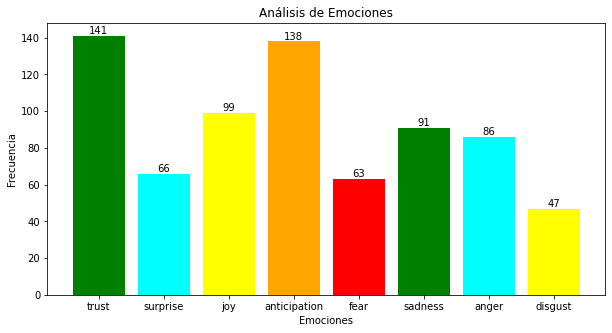

In [29]:
# Análisis de sentimientos más avanzado
import requests
from textblob import TextBlob
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize

# Asegúrate de haber descargado el archivo 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt' y coloca la ruta correcta aquí
nrc_lexicon_file = 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Carga del lexicon
def load_nrc_lexicon(file_path):
    nrc_lexicon = defaultdict(list)
    with open(file_path, 'r') as f:
        for line in f:
            word, emotion, association = line.strip().split('\t')
            if int(association) == 1:
                nrc_lexicon[emotion].append(word)
    return nrc_lexicon

# Análisis de emociones
def analyze_emotions(text, lexicon):
    emotions = defaultdict(int)
    words = word_tokenize(text.lower())
    for word in words:
        for emotion, words in lexicon.items():
            if word in words:
                emotions[emotion] += 1
    return emotions

# Función para obtener los comentarios
def get_reviews(asin):
    reviews = []
    page = 1
    while True:
        url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
        querystring = {
            "asin": asin,
            "country": "US",
            "sort_by": "TOP_REVIEWS",
            "star_rating": "ALL",
            "verified_purchases_only": "false",
            "images_or_videos_only": "false",
            "current_format_only": "false",
            "page": page
        }

        headers = {
            "x-rapidapi-key": "6e6fca29d2msh2d1ed4093c0d6cdp1c72a3jsn906a6e4ae54f",
            "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
        }

        response = requests.get(url, headers=headers, params=querystring)
        data = response.json()
        
        if 'data' in data and 'reviews' in data['data']:
            reviews_on_page = data['data']['reviews']
            if not reviews_on_page:
                break
            reviews.extend(reviews_on_page)
        else:
            break  # Stop if there are no more reviews or if the data format is unexpected
        
        page += 1
    return reviews

# Análisis de sentimientos
def analyze_sentiments(reviews):
    sentiments = []
    for review in reviews:
        analysis = TextBlob(review['review_comment'])
        sentiments.append(analysis.sentiment.polarity)
    if sentiments:
        avg_sentiment = sum(sentiments) / len(sentiments)
        return avg_sentiment
    else:
        return None

# Conversión de sentimiento a calificación
def sentiment_to_rating(avg_sentiment):
    return 1 + (avg_sentiment + 1) * 2

# Creación del medidor de calificación
def create_gauge_meter(rating):
    fig = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = rating,
        title = {'text': "Calificación Promedio de Sentimientos"},
        gauge = {
            'axis': {'range': [1, 5]},
            'steps' : [
                {'range': [1, 2], 'color': "red"},
                {'range': [2, 3], 'color': "orange"},
                {'range': [3, 4], 'color': "yellow"},
                {'range': [4, 5], 'color': "green"}
            ],
            'threshold' : {
                'line': {'color': "black", 'width': 4},
                'thickness': 0.75,
                'value': rating
            }
        }
    ))

    fig.show()

# Graficar emociones
def plot_emotions(emotions):
    categories = [category for category in emotions.keys() if category not in ['positive', 'negative']]
    values = [emotions[category] for category in categories]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(categories, values, color=['green', 'cyan', 'yellow', 'orange', 'red'])
    
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')
    
    plt.xlabel('Emociones')
    plt.ylabel('Frecuencia')
    plt.title('Análisis de Emociones')
    plt.show()

# Main
asin = "B0CN1QSH8Q"
nrc_lexicon = load_nrc_lexicon(nrc_lexicon_file)
reviews = get_reviews(asin)

if reviews:
    avg_sentiment = analyze_sentiments(reviews)
    if avg_sentiment is not None:
        rating = sentiment_to_rating(avg_sentiment)
        print(f"La calificación promedio de los sentimientos de los comentarios para el producto {asin} es: {rating:.2f}")
        create_gauge_meter(rating)
    
    all_reviews_text = ' '.join([review['review_comment'] for review in reviews])
    emotions = analyze_emotions(all_reviews_text, nrc_lexicon)
    plot_emotions(emotions)
else:
    print("No se encontraron comentarios.")
